In [2]:
import numpy as np
import pandas  as pd
import os
import math
import matplotlib.pyplot as plt
import seaborn as sbn
import glob

In [4]:
fb=pd.read_excel(r"C:\Users\harid\OneDrive\Desktop\python\data\datasets\Fiberbits_v1.xlsx")

In [5]:
fb.shape

(100000, 9)

In [6]:
fb.columns

Index(['active_cust', 'income', 'months_on_network', 'Num_complaints',
       'number_plan_changes', 'relocated', 'monthly_bill',
       'technical_issues_per_month', 'Speed_test_result'],
      dtype='object')

In [16]:
fb1=fb.select_dtypes(include=[np.number])

In [17]:
fb1.shape

(100000, 9)

In [19]:
"""    iterate through all the columns of a dataframe and modify the datatypes to 
         reduce memory usage"""


start_mem=fb.memory_usage().sum()/1024**2
print (" memory usage of dataframe is {:.2f}MB".format(start_mem))

for col in fb.columns:
    col_type=fb[col].dtype
    
    
    if col_type !=object:
        c_min=fb[col].min()
        c_max=fb[col].max()
        if str(col_type)[:3]=="int":
            if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                fb[col]=fb[col].astype(np.int8)
            elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                fb[col]=fb[col].astype(np.int16)
            elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                fb[col]=fb[col].astype(np.int32)
            elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                fb[col]=fb[col].astype(np.int64)
        else:
            if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                fb[col]=fb[col].astype(np.float16)
            elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                fb[col]=fb[col].astype(np.float32)
            else:
                fb[col]=fb[col].astype(np.float64)
    else:
        fb[col]=fb[col].astype("category")
end_mem=fb.memory_usage().sum()/1024**2
print(" memory usage after optimization is : {:.2f} MB ".format (end_mem))
print("decreased by {:.1f}%".format (100 *(start_mem - end_mem)/start_mem))

 memory usage of dataframe is 6.87MB
 memory usage after optimization is : 1.43 MB 
decreased by 79.2%


In [18]:
start_mem=fb.memory_usage().sum()/1024**2
print (" memory usage of dataframe is {:.2f}MB".format(start_mem))


 memory usage of dataframe is 6.87MB


In [20]:
fb.shape

(100000, 9)

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
mn=MinMaxScaler()
x=pd.DataFrame(mn.fit_transform(fb),columns=fb.columns)

In [23]:
x

,active_cust,income,months_on_network,Num_complaints,number_plan_changes,relocated,monthly_bill,technical_issues_per_month,Speed_test_result
0,0.0,0.001994,0.223881,0.333333,0.111111,0.0,0.602649,0.5,0.050000
1,0.0,0.001972,0.223881,0.333333,0.111111,0.0,0.682119,0.5,0.050000
2,0.0,0.002029,0.217484,0.333333,0.111111,0.0,0.582781,0.5,0.050000
3,0.0,0.002029,0.217484,0.333333,0.111111,0.0,0.615894,0.5,0.050000
4,1.0,0.002095,0.213220,0.333333,0.111111,0.0,0.973510,0.5,0.050000
...,...,...,...,...,...,...,...,...,...
99995,1.0,0.002374,0.194030,0.333333,0.222222,0.0,0.105960,0.5,0.053846
99996,1.0,0.002348,0.194030,0.333333,0.222222,0.0,0.112583,0.5,0.053846
99997,1.0,0.002370,0.194030,0.333333,0.222222,0.0,0.039735,0.5,0.053846
99998,1.0,0.002431,0.189765,0.333333,0.222222,0.0,0.112583,0.5,0.053846


In [24]:
from sklearn.preprocessing import MinMaxScaler

mn=MinMaxScaler()
x=pd.DataFrame(mn.fit_transform(fb),columns=fb.columns)

In [25]:
x

,active_cust,income,months_on_network,Num_complaints,number_plan_changes,relocated,monthly_bill,technical_issues_per_month,Speed_test_result
0,0.0,0.001994,0.223881,0.333333,0.111111,0.0,0.602649,0.5,0.050000
1,0.0,0.001972,0.223881,0.333333,0.111111,0.0,0.682119,0.5,0.050000
2,0.0,0.002029,0.217484,0.333333,0.111111,0.0,0.582781,0.5,0.050000
3,0.0,0.002029,0.217484,0.333333,0.111111,0.0,0.615894,0.5,0.050000
4,1.0,0.002095,0.213220,0.333333,0.111111,0.0,0.973510,0.5,0.050000
...,...,...,...,...,...,...,...,...,...
99995,1.0,0.002374,0.194030,0.333333,0.222222,0.0,0.105960,0.5,0.053846
99996,1.0,0.002348,0.194030,0.333333,0.222222,0.0,0.112583,0.5,0.053846
99997,1.0,0.002370,0.194030,0.333333,0.222222,0.0,0.039735,0.5,0.053846
99998,1.0,0.002431,0.189765,0.333333,0.222222,0.0,0.112583,0.5,0.053846


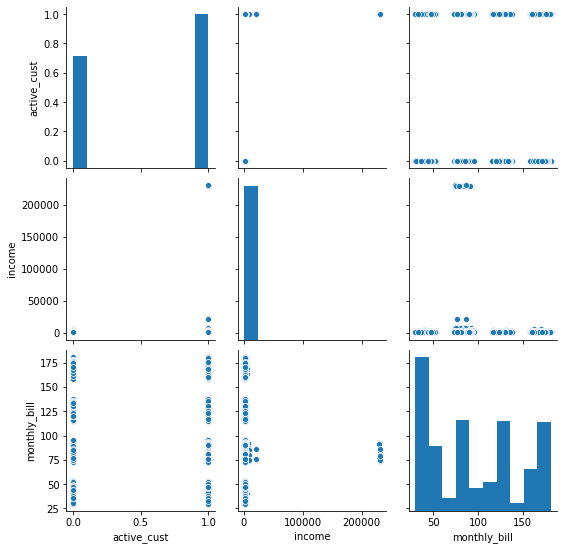

In [26]:
sbn.pairplot(fb[["active_cust","income","monthly_bill"]])

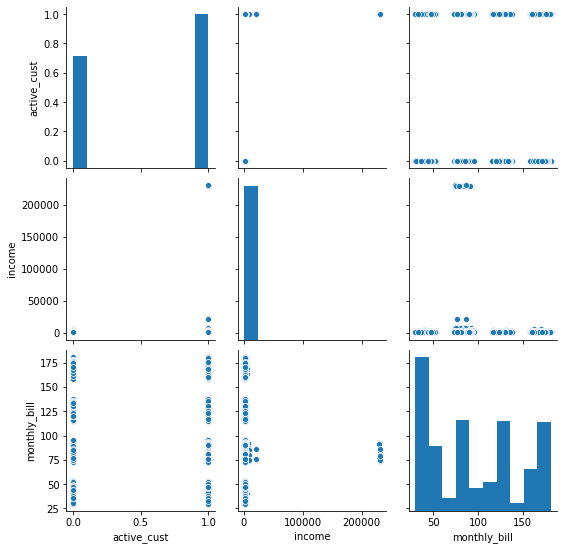

In [34]:
sbn.pairplot(fb[["active_cust","income","monthly_bill"]])

In [30]:
help(sbn)

Help on package seaborn:

NAME
    seaborn - # Capture the original matplotlib rcParams

PACKAGE CONTENTS
    algorithms
    axisgrid
    categorical
    cm
    colors (package)
    conftest
    distributions
    external (package)
    matrix
    miscplot
    palettes
    rcmod
    regression
    relational
    tests (package)
    utils
    widgets

DATA
    crayons = {'Almond': '#EFDECD', 'Antique Brass': '#CD9575', 'Apricot':...
    xkcd_rgb = {'acid green': '#8ffe09', 'adobe': '#bd6c48', 'algae': '#54...

VERSION
    0.10.1

FILE
    c:\users\harid\anaconda3\lib\site-packages\seaborn\__init__.py




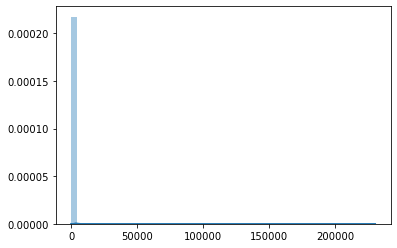

In [31]:
sbn.distplot(fb[["active_cust","income","monthly_bill"]])

In [32]:
from pylab import *

<function matplotlib.pyplot.legend(*args, **kwargs)>

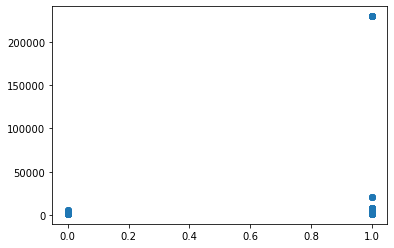

In [33]:
x1=fb.active_cust
x2=fb.income
plt.scatter(x1,x2)
plt.show
plt.legend

In [37]:
# model building

# identifying the right no of clusters

In [38]:
from sklearn.cluster import KMeans

In [39]:
km=KMeans()
km.fit(fb)
km.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 8,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [40]:
km=KMeans(verbose=1)
km.fit(fb)
km.get_params()

Initialization complete
Iteration 0, inertia 887936453.0
Iteration 1, inertia 773839022.7760701
Iteration 2, inertia 740344891.811658
Iteration 3, inertia 727173735.3832741
Iteration 4, inertia 722215024.3464001
Converged at iteration 4: center shift 43.47744651503834 within tolerance 81.7769730310092
Initialization complete
Iteration 0, inertia 1012195681.0
Iteration 1, inertia 750172653.0094353
Iteration 2, inertia 728267937.0861024
Iteration 3, inertia 722134595.1692375
Iteration 4, inertia 720359518.1604146
Converged at iteration 4: center shift 14.182208693438996 within tolerance 81.7769730310092
Initialization complete
Iteration 0, inertia 947502894.0
Iteration 1, inertia 776022430.0966952
Iteration 2, inertia 761680365.8842516
Iteration 3, inertia 744048194.5487293
Iteration 4, inertia 730782679.7986581
Iteration 5, inertia 724643885.6342585
Converged at iteration 5: center shift 53.267704969144994 within tolerance 81.7769730310092
Initialization complete
Iteration 0, inertia 10

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 8,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 1}

In [41]:
km=KMeans(verbose=2)
km.fit(fb)
km.get_params()

Initialization complete
Iteration 0, inertia 1223984664.0
Iteration 1, inertia 779258631.7400981
Iteration 2, inertia 767220581.0036061
Iteration 3, inertia 766905715.4918076
Iteration 4, inertia 766673464.6225154
Iteration 5, inertia 766472875.9380412
Iteration 6, inertia 766353958.8934532
Converged at iteration 6: center shift 79.7863121645021 within tolerance 81.7769730310092
Initialization complete
Iteration 0, inertia 821613831.0
Iteration 1, inertia 758371332.4763777
Iteration 2, inertia 740873078.735798
Iteration 3, inertia 732820819.3260568
Iteration 4, inertia 729735962.2943033
Converged at iteration 4: center shift 25.633525233170047 within tolerance 81.7769730310092
Initialization complete
Iteration 0, inertia 950875282.0
Iteration 1, inertia 791969952.5524292
Iteration 2, inertia 769811653.2240212
Iteration 3, inertia 749930055.2043369
Iteration 4, inertia 737169139.1061268
Iteration 5, inertia 731107090.8019695
Converged at iteration 5: center shift 54.738974882969636 with

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 8,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 2}

In [42]:
km=KMeans(verbose=3)
km.fit(fb)
km.get_params()

Initialization complete
Iteration 0, inertia 1117013617.0
Iteration 1, inertia 1020385319.9376215
Iteration 2, inertia 1007668617.0338426
Iteration 3, inertia 1000790185.9820498
Iteration 4, inertia 997351491.6958773
Converged at iteration 4: center shift 44.3684297335833 within tolerance 81.7769730310092
Initialization complete
Iteration 0, inertia 1057098456.0
Iteration 1, inertia 756926397.9354986
Iteration 2, inertia 739083655.6970469
Iteration 3, inertia 734703019.6944624
Iteration 4, inertia 733408029.1510873
Iteration 5, inertia 732554500.4531376
Converged at iteration 5: center shift 4.720744985393776 within tolerance 81.7769730310092
Initialization complete
Iteration 0, inertia 838933688.0
Iteration 1, inertia 733690930.4024916
Iteration 2, inertia 725257530.1141831
Converged at iteration 2: center shift 61.25833255420634 within tolerance 81.7769730310092
Initialization complete
Iteration 0, inertia 991892907.0
Iteration 1, inertia 776872549.1495365
Iteration 2, inertia 743418

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 8,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 3}

In [43]:
km=KMeans(n_clusters=4)
km.fit(fb)
km.get_params()
print(km.inertia_)

2960992197.033861


In [44]:
km=KMeans(n_clusters=5)
km.fit(fb)
km.get_params()
print(km.inertia_)

1840540002.6344168


In [45]:
km=KMeans(n_clusters=6)
km.fit(fb)
km.get_params()
print(km.inertia_)

1220423638.6824117


In [46]:
km=KMeans(n_clusters=9)
km.fit(fb)
km.get_params()
print(km.inertia_)

613662160.2896496


In [48]:
km=KMeans(n_clusters=100)
km.fit(fb)
km.get_params()
print(km.inertia_)

19641952.777427044


In [49]:
# using k elbow method where datapoint has optimal no of clusters

In [50]:
import matplotlib.pyplot as plt

In [57]:
# using the elbow method to find the optimal number of clusters


import matplotlib.pyplot as plt          

def kelbow(fb,k):
    from sklearn.cluster import KMeans               # k values : user need to specify the number of clusters
                                                    # we need to take optimal number of clusters into consideration
    x=[]
    for i in range(1,k):
        kmeans=KMeans(n_clusters=i)
        kmeans.fit(fb)
        x.append(kmeans.inertia_)
    plt.plot(range(1,k),x)
    plt.title(" the elbow method")
    plt.xlabel(" number of clusters")
    plt.ylabel(" wcss")

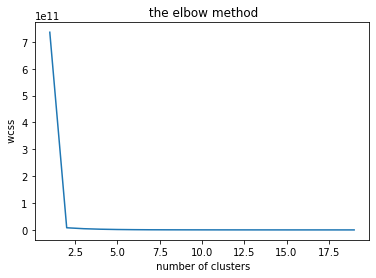

In [59]:
kelbow(fb[["active_cust","income"]],20)

In [60]:
fb.income.mean()

1855.27991

In [61]:
fb.income.median()

1805.0

In [62]:
fb.income.mode()

0    1862
1    1870
dtype: int32

In [63]:
fb.income.value_counts()

1862    353
1870    353
1869    348
1841    345
1858    345
       ... 
1246      1
1273      1
1209      1
6159      1
2618      1
Name: income, Length: 1404, dtype: int64

In [64]:
fb.columns

Index(['active_cust', 'income', 'months_on_network', 'Num_complaints',
       'number_plan_changes', 'relocated', 'monthly_bill',
       'technical_issues_per_month', 'Speed_test_result'],
      dtype='object')

In [75]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=5)
km.fit(fb[["active_cust","income"]])
len(km.predict(fb[["active_cust","income"]]))

100000

In [76]:
fb

,active_cust,income,months_on_network,Num_complaints,number_plan_changes,relocated,monthly_bill,technical_issues_per_month,Speed_test_result
0,0,1586,85,4,1,0,121,4,85
1,0,1581,85,4,1,0,133,4,85
2,0,1594,82,4,1,0,118,4,85
3,0,1594,82,4,1,0,123,4,85
4,1,1609,80,4,1,0,177,4,85
...,...,...,...,...,...,...,...,...,...
99995,1,1673,71,4,2,0,46,4,86
99996,1,1667,71,4,2,0,47,4,86
99997,1,1672,71,4,2,0,36,4,86
99998,1,1686,69,4,2,0,47,4,86


In [77]:
fb["clusters"]=km.predict(fb[["active_cust","income"]])

In [78]:
fb.head(2)

,active_cust,income,months_on_network,Num_complaints,number_plan_changes,relocated,monthly_bill,technical_issues_per_month,Speed_test_result,clusters
0,0,1586,85,4,1,0,121,4,85,2
1,0,1581,85,4,1,0,133,4,85,2


In [79]:
fb.clusters.value_counts()

2    68172
0    31318
3      492
1       14
4        4
Name: clusters, dtype: int64

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text major ticklabel objects>)

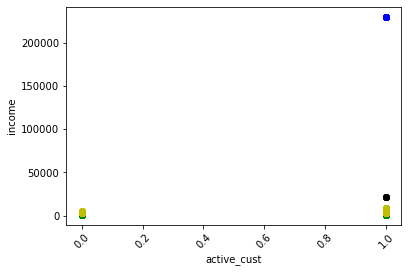

In [80]:
plt.scatter(fb[fb["clusters"]==0]["active_cust"],fb[fb["clusters"]==0]["income"],color="r")
plt.scatter(fb[fb["clusters"]==1]["active_cust"],fb[fb["clusters"]==1]["income"],color="b")
plt.scatter(fb[fb["clusters"]==2]["active_cust"],fb[fb["clusters"]==2]["income"],color="g")
plt.scatter(fb[fb["clusters"]==3]["active_cust"],fb[fb["clusters"]==3]["income"],color="y")
plt.scatter(fb[fb["clusters"]==4]["active_cust"],fb[fb["clusters"]==4]["income"],color="k")
plt.xlabel("active_cust")
plt.ylabel("income")
plt.xticks(rotation=45)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text major ticklabel objects>)

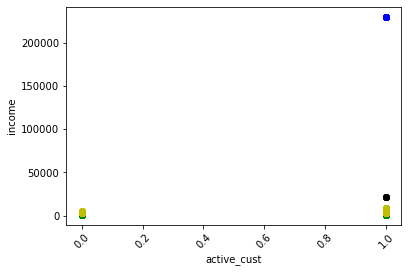

In [91]:
plt.scatter(fb[fb["clusters"]==0]["active_cust"],fb[fb["clusters"]==0]["income"],color="r")
plt.scatter(fb[fb["clusters"]==1]["active_cust"],fb[fb["clusters"]==1]["income"],color="b")
plt.scatter(fb[fb["clusters"]==2]["active_cust"],fb[fb["clusters"]==2]["income"],color="g")
plt.scatter(fb[fb["clusters"]==3]["active_cust"],fb[fb["clusters"]==3]["income"],color="y")
plt.scatter(fb[fb["clusters"]==4]["active_cust"],fb[fb["clusters"]==4]["income"],color="k")
plt.xlabel("active_cust")
plt.ylabel("income")
plt.xticks(rotation=45)

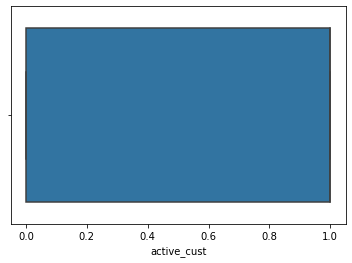

In [81]:
sbn.boxplot(fb.active_cust)

{'whiskers': [<matplotlib.lines.Line2D at 0x261d4204040>,
 'caps': [<matplotlib.lines.Line2D at 0x261d3f0bd30>,
 'boxes': [<matplotlib.lines.Line2D at 0x261d4204eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x261d420f3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x261d617e520>],
 'means': []}

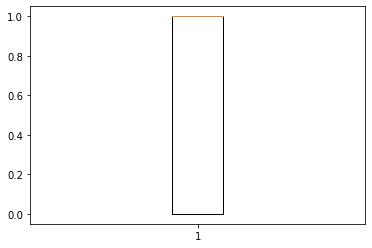

In [82]:
plt.boxplot(fb.active_cust)

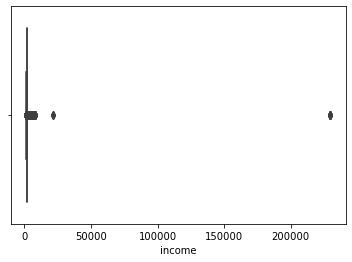

In [83]:
sbn.boxplot(fb.income)

{'whiskers': [<matplotlib.lines.Line2D at 0x261d3e56850>,
 'caps': [<matplotlib.lines.Line2D at 0x261d3e564f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x261d3e5c2b0>],
 'medians': [<matplotlib.lines.Line2D at 0x261d39962b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x261d3996820>],
 'means': []}

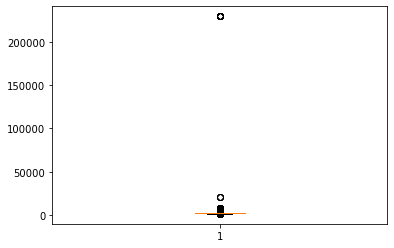

In [84]:
plt.boxplot(fb.income)

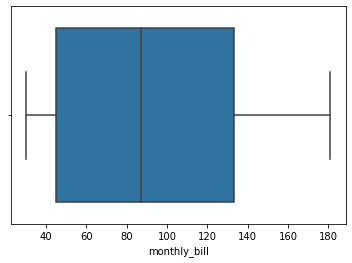

In [85]:
sbn.boxplot(fb.monthly_bill)

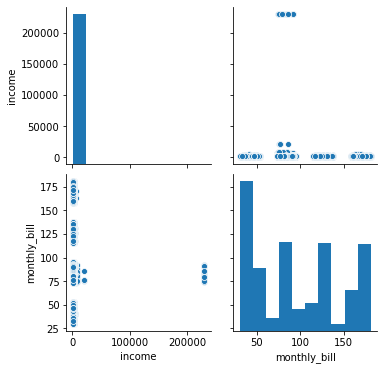

In [87]:
sbn.pairplot(fb[["income","monthly_bill"]])

In [90]:
# how do u validate whether ur cluster perforing well or not 

"""   Entropy is b/w 0 to 1. if the value is less than 0.5 its a good cluster if it is one
         its a bad cluster 
    Entropy is for getting accuracy score. entropy is based on probability calculation.
    
    entropy is  a homogeneous mixture as ur entropy value is 0.1 its a good cluster 
    
    
    in the same way cal the entropy for all the cluster with price and host_id and take the avg as the score """



import math
total_entropy=[]
for i in fb[fb["clusters"]==3]["income"]:
    num=list(fb[fb["clusters"]==3]["income"].values).count(i)
    den=fb[fb["clusters"]==3]["income"].shape[0]
    total_entropy.append(((num/den)*(1/math.log(num/den,2))))
    

    
total_entropy=np.array(total_entropy).sum()

total_entropy=-(total_entropy)

print(total_entropy)

8.159783835978768


[]

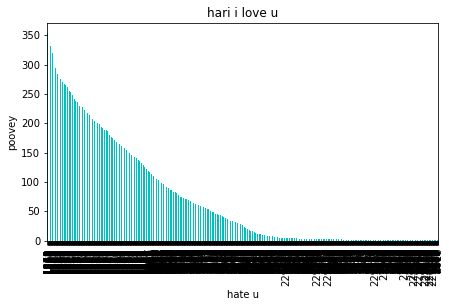

In [92]:
plt.figure(figsize=(7,4))
fb["income"].value_counts().plot(kind="bar",color="c", )
plt.xticks(rotation="vertical")
plt.title("hari i love u")
plt.xlabel("hate u")
plt.ylabel("poovey")
plt.plot()


[]

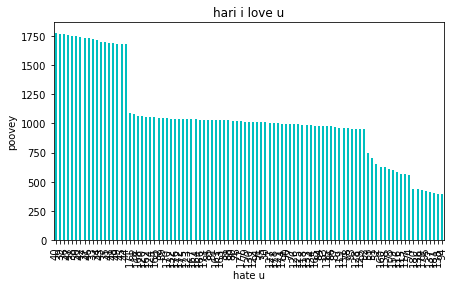

In [93]:
plt.figure(figsize=(7,4))
fb["monthly_bill"].value_counts().plot(kind="bar",color="c", )
plt.xticks(rotation="vertical")
plt.title("hari i love u")
plt.xlabel("hate u")
plt.ylabel("poovey")
plt.plot()


[]

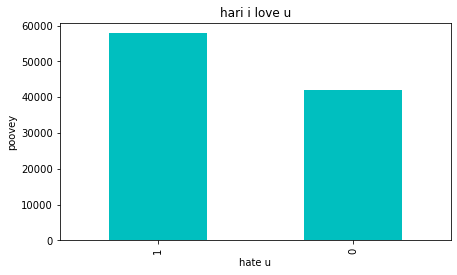

In [94]:
plt.figure(figsize=(7,4))
fb["active_cust"].value_counts().plot(kind="bar",color="c", )
plt.xticks(rotation="vertical")
plt.title("hari i love u")
plt.xlabel("hate u")
plt.ylabel("poovey")
plt.plot()


[]

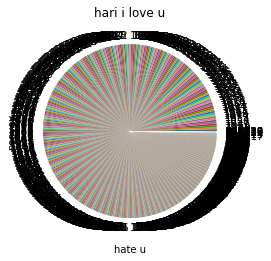

In [96]:
plt.figure(figsize=(7,4))
fb["income"].value_counts().plot(kind="pie")
plt.xticks(rotation="vertical")
plt.title("hari i love u")
plt.xlabel("hate u")
plt.ylabel("poovey")
plt.plot()


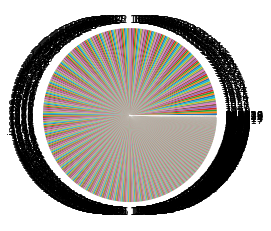

In [97]:
fb["income"].value_counts().plot(kind="pie")


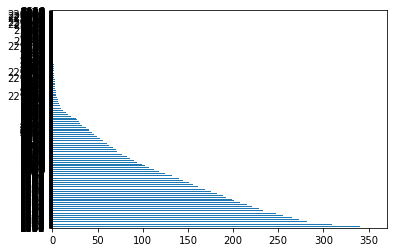

In [98]:
fb["income"].value_counts().plot(kind="barh")
